## Dataset Pontos - Análise Churn

In [1]:
## bibliotecas

import pandas as pd
import numpy as np

In [2]:
## importando os dados

df = pd.read_csv('dados_pontos.csv', sep=';')

df

,dtRef,idCustomer,Name,qtdeRecencia,freqDias,freqTransacoes,qtdListaPresença,qtdChatMessage,qtdTrocaPontos,qtdResgatarPonei,...,pctListaPresença,pctChatMessage,pctTrocaPontos,pctResgatarPonei,pctPresençaStreak,qtdePontosGanhos,qtdePontosGastos,qtdePontosSaldo,avgRecorrencia,flActive
0,2024-03-31,000ff655-fa9f-4baa-a108-47f581ec52a1,cajuuh,2.0,11,188,10,175,1,1,...,0.053191,0.930851,0.005319,0.005319,0.005319,1275,-1000,275,2.500000,1
1,2024-04-05,000ff655-fa9f-4baa-a108-47f581ec52a1,cajuuh,1.0,12,192,12,177,1,1,...,0.062500,0.921875,0.005208,0.005208,0.005208,1377,-1000,377,1.454545,1
2,2024-03-03,0097ab76-4637-4ece-8ebc-ab6abd61d662,losmundissas,24.0,1,1,1,0,0,0,...,1.000000,0.000000,0.000000,0.000000,0.000000,50,0,50,NaN,0
3,2024-03-08,0097ab76-4637-4ece-8ebc-ab6abd61d662,losmundissas,29.0,1,1,1,0,0,0,...,1.000000,0.000000,0.000000,0.000000,0.000000,50,0,50,NaN,0
4,2024-04-18,00a6d4c8-38e5-4e92-981e-4e4ac5084546,cecisssssss,1.0,3,5,3,2,0,0,...,0.600000,0.400000,0.000000,0.000000,0.000000,152,0,152,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,2024-03-21,fe59fd95-d131-4d50-bb6e-10cdfa7d5f47,comunista_tropical,13.0,7,84,6,78,0,0,...,0.071429,0.928571,0.000000,0.000000,0.000000,378,0,378,2.333333,0
2231,2024-04-06,feb1a34d-202a-4224-a1b3-0e737b12dd4d,mmenoli,1.0,8,12,8,4,0,0,...,0.666667,0.333333,0.000000,0.000000,0.000000,404,0,404,2.142857,1
2232,2024-04-25,feb1a34d-202a-4224-a1b3-0e737b12dd4d,mmenoli,1.0,15,35,14,20,0,1,...,0.400000,0.571429,0.000000,0.028571,0.000000,1220,0,1220,1.571429,1
2233,2024-03-01,fecbdf63-3bf4-44e5-8b1a-0acc9d963603,cianaglima,24.0,2,13,2,11,0,0,...,0.153846,0.846154,0.000000,0.000000,0.000000,111,0,111,1.000000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dtRef              2235 non-null   object 
 1   idCustomer         2235 non-null   object 
 2   Name               2235 non-null   object 
 3   qtdeRecencia       2235 non-null   float64
 4   freqDias           2235 non-null   int64  
 5   freqTransacoes     2235 non-null   int64  
 6   qtdListaPresença   2235 non-null   int64  
 7   qtdChatMessage     2235 non-null   int64  
 8   qtdTrocaPontos     2235 non-null   int64  
 9   qtdResgatarPonei   2235 non-null   int64  
 10  qtdPresençaStreak  2235 non-null   int64  
 11  pctListaPresença   2235 non-null   float64
 12  pctChatMessage     2235 non-null   float64
 13  pctTrocaPontos     2235 non-null   float64
 14  pctResgatarPonei   2235 non-null   float64
 15  pctPresençaStreak  2235 non-null   float64
 16  qtdePontosGanhos   2235 

In [4]:
df.shape

(2235, 21)

### Divisão Da Base

In [5]:
from sklearn import model_selection

In [6]:
## olhando as colunas

df.columns

Index(['dtRef', 'idCustomer', 'Name', 'qtdeRecencia', 'freqDias',
       'freqTransacoes', 'qtdListaPresença', 'qtdChatMessage',
       'qtdTrocaPontos', 'qtdResgatarPonei', 'qtdPresençaStreak',
       'pctListaPresença', 'pctChatMessage', 'pctTrocaPontos',
       'pctResgatarPonei', 'pctPresençaStreak', 'qtdePontosGanhos',
       'qtdePontosGastos', 'qtdePontosSaldo', 'avgRecorrencia', 'flActive'],
      dtype='object')

In [7]:
## fazendo a seleção de features

features = df.columns[3:-1]

features

Index(['qtdeRecencia', 'freqDias', 'freqTransacoes', 'qtdListaPresença',
       'qtdChatMessage', 'qtdTrocaPontos', 'qtdResgatarPonei',
       'qtdPresençaStreak', 'pctListaPresença', 'pctChatMessage',
       'pctTrocaPontos', 'pctResgatarPonei', 'pctPresençaStreak',
       'qtdePontosGanhos', 'qtdePontosGastos', 'qtdePontosSaldo',
       'avgRecorrencia'],
      dtype='object')

In [8]:
target = 'flActive'

In [9]:
## separação da base

X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], random_state=42, test_size=0.2,
                                                                   stratify=df[target]) ## esse último argumento serve para deixar as proporções iguais no treino e teste

In [10]:
print('Tx Resposta Treino:', y_train.mean())
print('Tx Resposta Teste:', y_test.mean())

Tx Resposta Treino: 0.32550335570469796
Tx Resposta Teste: 0.32662192393736017


Como podemos verificar acima, quando estratificamos os dados, deixamos as proporções mais equivalentes

## Tratamentos E Pipelines

In [11]:
from feature_engine import imputation
from sklearn import pipeline
from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import metrics

In [12]:
## verificando colunas com números ausentes

X_train.isna().sum()

qtdeRecencia           0
freqDias               0
freqTransacoes         0
qtdListaPresença       0
qtdChatMessage         0
qtdTrocaPontos         0
qtdResgatarPonei       0
qtdPresençaStreak      0
pctListaPresença       0
pctChatMessage         0
pctTrocaPontos         0
pctResgatarPonei       0
pctPresençaStreak      0
qtdePontosGanhos       0
qtdePontosGastos       0
qtdePontosSaldo        0
avgRecorrencia       810
dtype: int64

In [13]:
## estabelecendo critério máximo para a coluna com ausentes - avgRecorrencia

max_avgRecorrencia = X_train['avgRecorrencia'].max()

In [14]:
## fazendo imputer

imputacao_max = imputation.ArbitraryNumberImputer(variables = ['avgRecorrencia'],
                                                 arbitrary_number = max_avgRecorrencia)

In [15]:
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=50)

imputacao_max.fit(X_train)

X_trains_transform = imputacao_max.transform(X_train)

X_trains_transform

,qtdeRecencia,freqDias,freqTransacoes,qtdListaPresença,qtdChatMessage,qtdTrocaPontos,qtdResgatarPonei,qtdPresençaStreak,pctListaPresença,pctChatMessage,pctTrocaPontos,pctResgatarPonei,pctPresençaStreak,qtdePontosGanhos,qtdePontosGastos,qtdePontosSaldo,avgRecorrencia
1073,7.0,2,6,1,5,0,0,0,0.166667,0.833333,0.0,0.0,0.0,55,0,55,1.0
479,3.0,1,1,1,0,0,0,0,1.000000,0.000000,0.0,0.0,0.0,50,0,50,26.0
723,1.0,7,47,0,47,0,0,0,0.000000,1.000000,0.0,0.0,0.0,47,0,47,1.5
1226,17.0,2,21,1,20,0,0,0,0.047619,0.952381,0.0,0.0,0.0,70,0,70,6.0
536,29.0,1,5,1,4,0,0,0,0.200000,0.800000,0.0,0.0,0.0,54,0,54,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,13.0,1,1,1,0,0,0,0,1.000000,0.000000,0.0,0.0,0.0,50,0,50,26.0
70,19.0,5,6,5,1,0,0,0,0.833333,0.166667,0.0,0.0,0.0,251,0,251,2.5
1562,6.0,1,1,1,0,0,0,0,1.000000,0.000000,0.0,0.0,0.0,50,0,50,26.0
1549,24.0,1,1,1,0,0,0,0,1.000000,0.000000,0.0,0.0,0.0,50,0,50,26.0


Exemplo acima de forma a tratar uma coluna específica de forma apartada - essa forma não é muito eficiente

Ideal é seguir com a construção de um Pipeline

In [16]:
## demonstrando agora com pipeline

max_avgRecorrencia = X_train['avgRecorrencia'].max()

## fazendo imputer

features_imput_0 = ['qtdeRecencia', 'freqDias', 'freqTransacoes', 'qtdListaPresença',
       'qtdChatMessage', 'qtdTrocaPontos', 'qtdResgatarPonei',
       'qtdPresençaStreak', 'pctListaPresença', 'pctChatMessage',
       'pctTrocaPontos', 'pctResgatarPonei', 'pctPresençaStreak',
       'qtdePontosGanhos', 'qtdePontosGastos', 'qtdePontosSaldo',]

imputacao_0 = imputation.ArbitraryNumberImputer(variables = features_imput_0, 
                                               arbitrary_number=0)

imputacao_max = imputation.ArbitraryNumberImputer(variables = ['avgRecorrencia'],
                                                 arbitrary_number = max_avgRecorrencia)

model = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=50)

meu_pipeline = pipeline.Pipeline([
    ('imput_max', imputacao_max),
    ('imput_0', imputacao_0),
    ('model', model)
])

meu_pipeline.fit(X_train, y_train)


Pipeline(steps=[('imput_max',
                 ArbitraryNumberImputer(arbitrary_number=26.0,
                                        variables=['avgRecorrencia'])),
                ('imput_0',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['qtdeRecencia', 'freqDias',
                                                   'freqTransacoes',
                                                   'qtdListaPresença',
                                                   'qtdChatMessage',
                                                   'qtdTrocaPontos',
                                                   'qtdResgatarPonei',
                                                   'qtdPresençaStreak',
                                                   'pctListaPresença',
                                                   'pctChatMessage',
                                                   'pctTrocaPontos',
                                                   'pctResgatarPonei',
                                                   'pctPresençaStreak',
                                                   'qtdePontosGanhos',
                                                   'qtdePontosGastos',
                                                   'qtdePontosSaldo'])),
                ('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=50))])

In [17]:
y_test_predict = meu_pipeline.predict(X_test)
y_test_proba = meu_pipeline.predict_proba(X_test)[:,1]

In [18]:
y_train_predict = meu_pipeline.predict(X_train)
y_train_proba = meu_pipeline.predict_proba(X_train)[:,1]

In [19]:
acc_train = metrics.accuracy_score(y_train, y_train_predict)
acc_test = metrics.accuracy_score(y_test, y_test_predict)

print("Acurácia base train:", acc_train)
print("Acurácia base test:", acc_test)

Acurácia base train: 0.8109619686800895
Acurácia base test: 0.8008948545861297


In [20]:
auc_train = metrics.roc_auc_score(y_train, y_train_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_proba)

print("AUC base train:", auc_train)
print("AUC base test:", auc_test)

AUC base train: 0.8531284015204619
AUC base test: 0.8380512447094162


## Tentativa De Melhorar O Algoritmo

In [21]:
## demonstrando agora com pipeline

max_avgRecorrencia = X_train['avgRecorrencia'].max()

## fazendo imputer

features_imput_0 = ['qtdeRecencia', 'freqDias', 'freqTransacoes', 'qtdListaPresença',
       'qtdChatMessage', 'qtdTrocaPontos', 'qtdResgatarPonei',
       'qtdPresençaStreak', 'pctListaPresença', 'pctChatMessage',
       'pctTrocaPontos', 'pctResgatarPonei', 'pctPresençaStreak',
       'qtdePontosGanhos', 'qtdePontosGastos', 'qtdePontosSaldo',]

imputacao_0 = imputation.ArbitraryNumberImputer(variables = features_imput_0, 
                                               arbitrary_number=0)

imputacao_max = imputation.ArbitraryNumberImputer(variables = ['avgRecorrencia'],
                                                 arbitrary_number = max_avgRecorrencia)

model_tree = ensemble.RandomForestClassifier(n_estimators=150,
    max_depth=4, 
    min_samples_leaf=50)

meu_pipeline_tree = pipeline.Pipeline([
    ('imput_max', imputacao_max),
    ('imput_0', imputacao_0),
    ('model', model_tree)
])

meu_pipeline_tree.fit(X_train, y_train)


Pipeline(steps=[('imput_max',
                 ArbitraryNumberImputer(arbitrary_number=26.0,
                                        variables=['avgRecorrencia'])),
                ('imput_0',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['qtdeRecencia', 'freqDias',
                                                   'freqTransacoes',
                                                   'qtdListaPresença',
                                                   'qtdChatMessage',
                                                   'qtdTrocaPontos',
                                                   'qtdResgatarPonei',
                                                   'qtdPresençaStreak',
                                                   'pctListaPresença',
                                                   'pctChatMessage',
                                                   'pctTrocaPontos',
                                                   'pctResgatarPonei',
                                                   'pctPresençaStreak',
                                                   'qtdePontosGanhos',
                                                   'qtdePontosGastos',
                                                   'qtdePontosSaldo'])),
                ('model',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=50,
                                        n_estimators=150))])

In [22]:
y_test_predict_tree = meu_pipeline_tree.predict(X_test)
y_test_proba_tree = meu_pipeline_tree.predict_proba(X_test)[:,1]

In [23]:
y_train_predict_tree = meu_pipeline_tree.predict(X_train)
y_train_proba_tree = meu_pipeline_tree.predict_proba(X_train)[:,1]

In [24]:
acc_train_tree = metrics.accuracy_score(y_train, y_train_predict_tree)
acc_test_tree = metrics.accuracy_score(y_test, y_test_predict_tree)

print("Acurácia base train:", acc_train_tree)
print("Acurácia base test:", acc_test_tree)

Acurácia base train: 0.8008948545861297
Acurácia base test: 0.8008948545861297


In [25]:
auc_train_tree = metrics.roc_auc_score(y_train, y_train_proba_tree)
auc_test_tree = metrics.roc_auc_score(y_test, y_test_proba_tree)

print("AUC base train:", auc_train_tree)
print("AUC base test:", auc_test_tree)

AUC base train: 0.8433320225903699
AUC base test: 0.8494174668911846


## Inserindo Grid

In [26]:
## demonstrando agora com pipeline

max_avgRecorrencia = X_train['avgRecorrencia'].max()

## fazendo imputer

features_imput_0 = ['qtdeRecencia', 'freqDias', 'freqTransacoes', 'qtdListaPresença',
       'qtdChatMessage', 'qtdTrocaPontos', 'qtdResgatarPonei',
       'qtdPresençaStreak', 'pctListaPresença', 'pctChatMessage',
       'pctTrocaPontos', 'pctResgatarPonei', 'pctPresençaStreak',
       'qtdePontosGanhos', 'qtdePontosGastos', 'qtdePontosSaldo',]

imputacao_0 = imputation.ArbitraryNumberImputer(variables = features_imput_0, 
                                               arbitrary_number=0)

imputacao_max = imputation.ArbitraryNumberImputer(variables = ['avgRecorrencia'],
                                                 arbitrary_number = max_avgRecorrencia)

model_tree = ensemble.RandomForestClassifier(random_state=42)

meu_pipeline_tree = pipeline.Pipeline([
    ('imput_max', imputacao_max),
    ('imput_0', imputacao_0),
    ('model', model_tree)
])

params = {
    'model__n_estimators': [100,150,250,500],
    'model__min_samples_leaf': [10,20,30,50,100]
}

grid = model_selection.GridSearchCV(meu_pipeline_tree, 
                                    param_grid=params, 
                                    n_jobs=-1,
                                    scoring = 'roc_auc'
)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imput_max',
                                        ArbitraryNumberImputer(arbitrary_number=26.0,
                                                               variables=['avgRecorrencia'])),
                                       ('imput_0',
                                        ArbitraryNumberImputer(arbitrary_number=0,
                                                               variables=['qtdeRecencia',
                                                                          'freqDias',
                                                                          'freqTransacoes',
                                                                          'qtdListaPresença',
                                                                          'qtdChatMessage',
                                                                          'qtdTrocaPontos',
                                                                          'qtdResgatarPonei',
                                                                          'qtdPresençaStreak',
                                                                          'pctListaPresença',
                                                                          'pctChatMessage',
                                                                          'pctTrocaPontos',
                                                                          'pctResgatarPonei',
                                                                          'pctPresençaStreak',
                                                                          'qtdePontosGanhos',
                                                                          'qtdePontosGastos',
                                                                          'qtdePontosSaldo'])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__min_samples_leaf': [10, 20, 30, 50, 100],
                         'model__n_estimators': [100, 150, 250, 500]},
             scoring='roc_auc')

In [27]:
y_test_predict_tree = grid.predict(X_test)
y_test_proba_tree = grid.predict_proba(X_test)[:,1]

y_train_predict_tree = grid.predict(X_train)
y_train_proba_tree = grid.predict_proba(X_train)[:,1]

In [28]:
acc_train_tree = metrics.accuracy_score(y_train, y_train_predict_tree)
acc_test_tree = metrics.accuracy_score(y_test, y_test_predict_tree)

print("Acurácia base train:", acc_train_tree)
print("Acurácia base test:", acc_test_tree)

Acurácia base train: 0.8098434004474273
Acurácia base test: 0.8008948545861297


In [29]:
auc_train_tree = metrics.roc_auc_score(y_train, y_train_proba_tree)
auc_test_tree = metrics.roc_auc_score(y_test, y_test_proba_tree)

print("AUC base train:", auc_train_tree)
print("AUC base test:", auc_test_tree)

AUC base train: 0.8729569506419792
AUC base test: 0.8565284667546533


## Inserindo Grid Dentro Do Pipeline

In [30]:
## demonstrando agora com pipeline

max_avgRecorrencia = X_train['avgRecorrencia'].max()

## fazendo imputer

features_imput_0 = ['qtdeRecencia', 'freqDias', 'freqTransacoes', 'qtdListaPresença',
       'qtdChatMessage', 'qtdTrocaPontos', 'qtdResgatarPonei',
       'qtdPresençaStreak', 'pctListaPresença', 'pctChatMessage',
       'pctTrocaPontos', 'pctResgatarPonei', 'pctPresençaStreak',
       'qtdePontosGanhos', 'qtdePontosGastos', 'qtdePontosSaldo',]

imputacao_0 = imputation.ArbitraryNumberImputer(variables = features_imput_0, 
                                               arbitrary_number=0)

imputacao_max = imputation.ArbitraryNumberImputer(variables = ['avgRecorrencia'],
                                                 arbitrary_number = max_avgRecorrencia)

model_tree = ensemble.RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100,150,250,500],
    'min_samples_leaf': [10,20,30,50,100]
}

grid = model_selection.GridSearchCV(model_tree, 
                                    param_grid=params, 
                                    n_jobs=-1,
                                    scoring = 'roc_auc'
)

meu_pipeline_tree = pipeline.Pipeline([
    ('imput_max', imputacao_max),
    ('imput_0', imputacao_0),
    ('model', grid)
])

meu_pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('imput_max',
                 ArbitraryNumberImputer(arbitrary_number=26.0,
                                        variables=['avgRecorrencia'])),
                ('imput_0',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['qtdeRecencia', 'freqDias',
                                                   'freqTransacoes',
                                                   'qtdListaPresença',
                                                   'qtdChatMessage',
                                                   'qtdTrocaPontos',
                                                   'qtdResgatarPonei',
                                                   'qtdPresençaStreak',
                                                   'pctListaPresença',
                                                   'pctChatMessage',
                                                   'pctTrocaPontos',
                                                   'pctResgatarPonei',
                                                   'pctPresençaStreak',
                                                   'qtdePontosGanhos',
                                                   'qtdePontosGastos',
                                                   'qtdePontosSaldo'])),
                ('model',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'min_samples_leaf': [10, 20, 30, 50,
                                                               100],
                                          'n_estimators': [100, 150, 250, 500]},
                              scoring='roc_auc'))])

In [31]:
y_test_predict_tree = meu_pipeline_tree.predict(X_test)
y_test_proba_tree = meu_pipeline_tree.predict_proba(X_test)

y_train_predict_tree = meu_pipeline_tree.predict(X_train)
y_train_proba_tree = meu_pipeline_tree.predict_proba(X_train)[:,1]

In [32]:
acc_train_tree = metrics.accuracy_score(y_train, y_train_predict_tree)
acc_test_tree = metrics.accuracy_score(y_test, y_test_predict_tree)

print("Acurácia base train:", acc_train_tree)
print("Acurácia base test:", acc_test_tree)

Acurácia base train: 0.8098434004474273
Acurácia base test: 0.8008948545861297


In [33]:
auc_train_tree = metrics.roc_auc_score(y_train, y_train_proba_tree)
auc_test_tree = metrics.roc_auc_score(y_test, y_test_proba_tree[:,1])

print("AUC base train:", auc_train_tree)
print("AUC base test:", auc_test_tree)

AUC base train: 0.8729569506419792
AUC base test: 0.8565284667546533


### Verificando O Melhor Parâmetro

In [34]:
## verifcando o melhor parâmetro

grid.best_params_

{'min_samples_leaf': 20, 'n_estimators': 250}

In [35]:
grid.best_estimator_

RandomForestClassifier(min_samples_leaf=20, n_estimators=250, random_state=42)

### Checando Feature Importance

In [36]:
f_importance = meu_pipeline_tree[-1].best_estimator_.feature_importances_
pd.Series(f_importance, index=features).sort_values(ascending=False)

qtdeRecencia         0.353056
freqDias             0.134334
qtdePontosGanhos     0.127601
freqTransacoes       0.089548
qtdListaPresença     0.068551
qtdePontosSaldo      0.065951
qtdChatMessage       0.048080
avgRecorrencia       0.046721
pctChatMessage       0.020132
pctListaPresença     0.019342
pctPresençaStreak    0.006598
qtdResgatarPonei     0.005811
pctResgatarPonei     0.005073
qtdPresençaStreak    0.004463
pctTrocaPontos       0.002892
qtdTrocaPontos       0.001781
qtdePontosGastos     0.000069
dtype: float64

In [37]:
## baixando library de visualização

import scikitplot as skplt
import matplotlib.pyplot as plt

<Figure size 3840x2880 with 0 Axes>

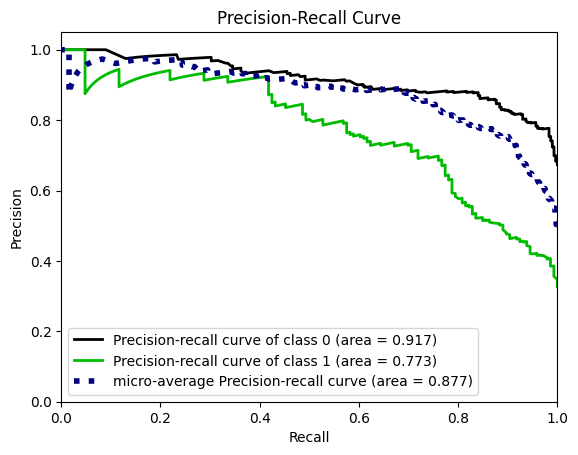

In [38]:
plt.figure(dpi=600)
skplt.metrics.plot_precision_recall(y_test, y_test_proba_tree)
plt.show()

<Figure size 3840x2880 with 0 Axes>

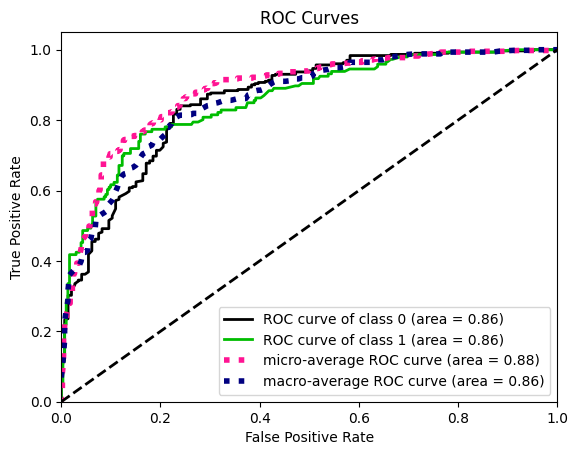

In [39]:
plt.figure(dpi=600)
skplt.metrics.plot_roc(y_test, y_test_proba_tree)
plt.show()

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

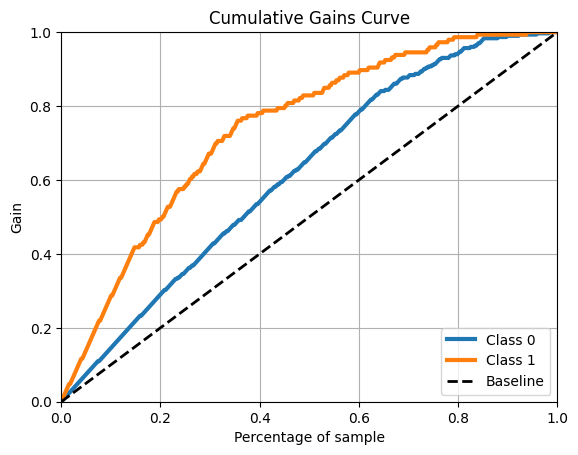

In [40]:
skplt.metrics.plot_cumulative_gain(y_test, y_test_proba_tree)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

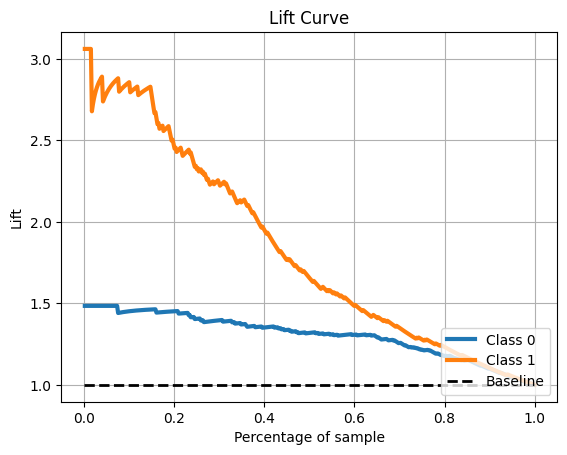

In [41]:
## curva lift

skplt.metrics.plot_lift_curve(y_test, y_test_proba_tree)

## Entendendo KS - Kolmogorov-Smirnov

In [42]:
y_test_proba_tree = meu_pipeline_tree.predict_proba(X_test)
y_test_proba_tree

array([[0.37767732, 0.62232268],
       [0.7826126 , 0.2173874 ],
       [0.92731716, 0.07268284],
       [0.65434436, 0.34565564],
       [0.85587504, 0.14412496],
       [0.93070224, 0.06929776],
       [0.95733177, 0.04266823],
       [0.72461866, 0.27538134],
       [0.83733913, 0.16266087],
       [0.81118898, 0.18881102],
       [0.95570356, 0.04429644],
       [0.33364761, 0.66635239],
       [0.93802288, 0.06197712],
       [0.9193365 , 0.0806635 ],
       [0.1944498 , 0.8055502 ],
       [0.64239667, 0.35760333],
       [0.65003127, 0.34996873],
       [0.07638803, 0.92361197],
       [0.63299366, 0.36700634],
       [0.4203773 , 0.5796227 ],
       [0.51215177, 0.48784823],
       [0.82173298, 0.17826702],
       [0.7256483 , 0.2743517 ],
       [0.70496708, 0.29503292],
       [0.79740484, 0.20259516],
       [0.94768018, 0.05231982],
       [0.58191874, 0.41808126],
       [0.69754824, 0.30245176],
       [0.57505285, 0.42494715],
       [0.11221514, 0.88778486],
       [0.

In [43]:
## Selecionando apenas as probabilidades de "1"

df = pd.DataFrame({
    'flActive': y_test,
    "proba_modelo": y_test_proba_tree[:,1]
})

df

,flActive,proba_modelo
984,1,0.622323
1676,0,0.217387
1420,0,0.072683
1242,0,0.345656
2149,0,0.144125
...,...,...
2045,0,0.144007
609,1,0.684466
1662,1,0.669293
1463,1,0.715511


<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

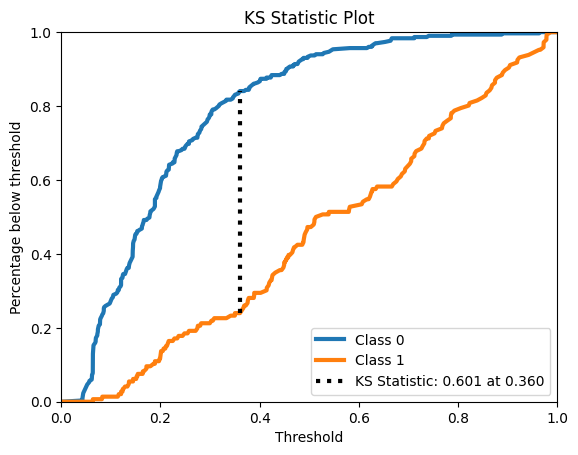

In [45]:
skplt.metrics.plot_ks_statistic(y_test, y_test_proba_tree)

## Como Salver O Modelo?

In [46]:
model_s = pd.Series({
    'model': meu_pipeline_tree,
    'features': features,
    'auc_test': auc_test_tree
})

model_s

model       (ArbitraryNumberImputer(arbitrary_number=26.0,...
features    Index(['qtdeRecencia', 'freqDias', 'freqTransa...
auc_test                                             0.856528
dtype: object

In [47]:
## podemos serializar o modelo - tornar binário

model_s.to_pickle('modelo_tree.pkl')